# Data Scientist Professional Case Study

### Company Background

Inn the Neighborhood is an online platform that allows people to rent out their properties for short stays. At the moment, only 2% of people who come to the site interested in renting out their homes start to use it.

The product manager would like to increase this. They want to develop an application to help people estimate how much they could earn renting out their living space. They hope that this would make people more likely to sign up.



### Customer Question

The product manager would like to know:
- Can you develop a way to predict how much someone could earn from renting their property that could power the application?




### Success Criteria

They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.


### Dataset

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler





In [3]:
rentals= pd.read_csv('data/rentals.csv')

# first thing we need to do is to clean the data 
# then we need to change object types to numeric types 

In [4]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


In [5]:
rentals.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [6]:
rentals.isna().value_counts()

id     latitude  longitude  property_type  room_type  bathrooms  bedrooms  minimum_nights  price
False  False     False      False          False      False      False     False           False    8095
                                                      True       False     False           False      12
                                                      False      True      False           False       4
dtype: int64

In [7]:
rentals.dropna(inplace=True)

In [8]:
rentals.isna().value_counts()

id     latitude  longitude  property_type  room_type  bathrooms  bedrooms  minimum_nights  price
False  False     False      False          False      False      False     False           False    8095
dtype: int64

 # our problem is a regression type so the price column should be a numeric type 

In [9]:
rentals['price'] = rentals['price'].str.strip('$')

In [10]:
rentals['price']=rentals['price'].str.replace(',','').astype('float')

# bathrooms and bedrooms should be integers types 'we can't have half a toilet can we '

In [11]:
rentals['bathrooms']=rentals['bathrooms'].astype('int')

In [12]:
rentals['bedrooms']=rentals['bedrooms'].astype('int')

# time to see if there is  relationships between variables

In [13]:
rentals.corr()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
id,1.000000,0.032715,0.046480,0.045927,-0.067391,-0.004459,0.019076
latitude,0.032715,1.000000,0.187000,0.082008,-0.108647,-0.007415,0.083231
longitude,0.046480,0.187000,1.000000,0.017931,-0.115893,0.002028,0.015867
bathrooms,0.045927,0.082008,0.017931,1.000000,0.292686,-0.004178,0.069861
bedrooms,-0.067391,-0.108647,-0.115893,0.292686,1.000000,-0.004159,0.262343
minimum_nights,-0.004459,-0.007415,0.002028,-0.004178,-0.004159,1.000000,-0.004247
price,0.019076,0.083231,0.015867,0.069861,0.262343,-0.004247,1.000000


# there is a small postive correlation between the price and the number of bedrooms but that was not the case for the bathrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

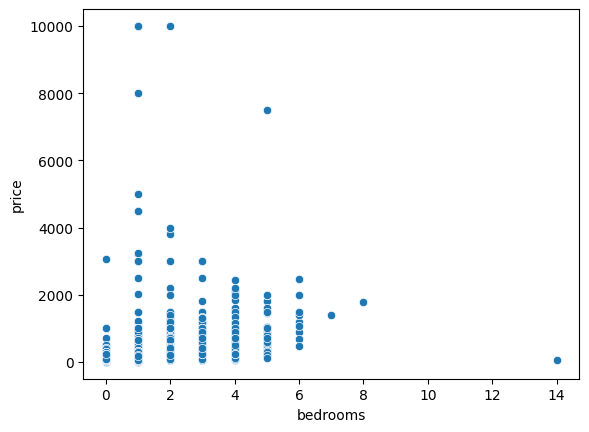

In [14]:
sns.scatterplot(x='bedrooms',y='price',data=rentals)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

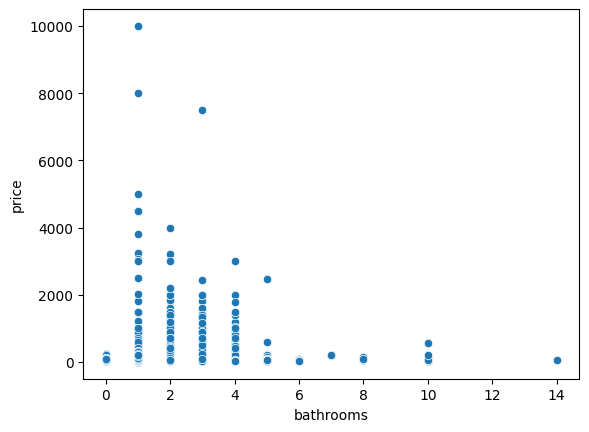

In [15]:
sns.scatterplot(x='bathrooms',y='price',data=rentals)

# it's clear that the prices of private rooms can go way higher compared to the others spaces

<AxesSubplot:xlabel='room_type', ylabel='price'>

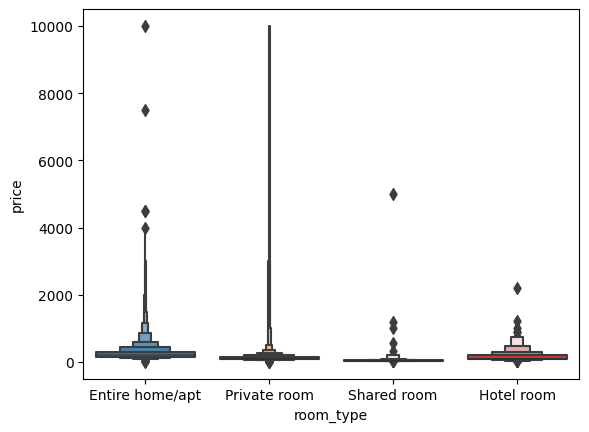

In [16]:
sns.boxenplot(y='price',x='room_type',data=rentals)

# this lineplot is quite logical the more bedrooms the more bathrooms we need

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

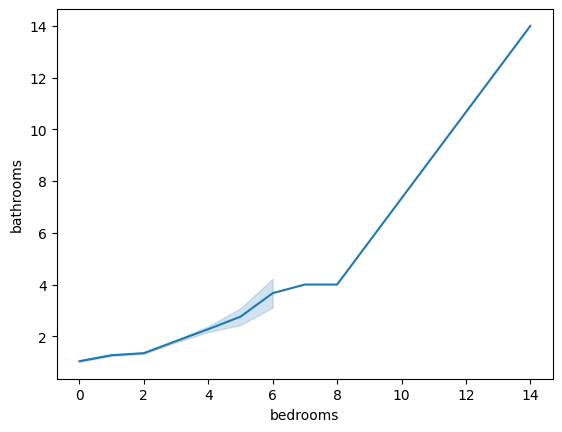

In [17]:
sns.lineplot(y='bathrooms',x='bedrooms',data=rentals)

# These two tables represents the different values of minimum_nights column we can clearly see there are many outliers that go up to 1000 and 10000000 and the majority of values are one month to 6 months  


In [18]:
rentals['minimum_nights'].value_counts()

30           3262
2            1553
1            1422
3             863
4             322
5             216
31            114
7              74
32             60
60             40
6              36
90             31
180            18
14             10
365             9
13              4
120             4
21              4
10              4
183             3
360             3
50              3
80              3
18              2
29              2
45              2
58              2
8               2
75              2
40              2
100             1
1000            1
65              1
15              1
12              1
38              1
25              1
11              1
150             1
188             1
59              1
100000000       1
85              1
1125            1
28              1
140             1
55              1
110             1
16              1
70              1
200             1
9               1
33              1
Name: minimum_nights, dtype: int64

# time to create x and y

In [19]:
x=rentals.drop('price',axis=1)
y=rentals[['price']]

# the property_type column need to become a numerical it's not an ordinal column and there are many types so i can't change to dummy variables so i decided to drop it 

In [20]:
x['property_type'].value_counts()

Apartment             3234
House                 2313
Condominium            892
Guest suite            577
Boutique hotel         267
Hotel                  157
Townhouse              142
Serviced apartment     121
Loft                    88
Hostel                  86
Bed and breakfast       43
Guesthouse              41
Aparthotel              41
Other                   24
Bungalow                17
Resort                  14
Cottage                 12
Villa                   10
Castle                   4
Cabin                    3
Tiny house               3
Earth house              2
In-law                   1
Camper/RV                1
Dome house               1
Hut                      1
Name: property_type, dtype: int64

In [21]:
x.drop("property_type",inplace=True,axis=1)


# the room type is an ordinal type we can go from home -> hothel room -> room(shared or private)

In [22]:
x['room_type'].value_counts()

Entire home/apt    4767
Private room       2886
Shared room         235
Hotel room          207
Name: room_type, dtype: int64

In [23]:
le=LabelEncoder()
x['room_type'] = le.fit_transform(x['room_type'])

In [24]:
x['room_type'].value_counts()

0    4767
2    2886
3     235
1     207
Name: room_type, dtype: int64

In [25]:
x.head()

,id,latitude,longitude,room_type,bathrooms,bedrooms,minimum_nights
0,958,37.76931,-122.43386,0,1,1,1
1,3850,37.75402,-122.45805,2,1,1,1
2,5858,37.74511,-122.42102,0,1,2,30
3,7918,37.76669,-122.45250,2,4,1,32
4,8142,37.76487,-122.45183,2,4,1,32


# now we split the data to train and test

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# for my basic model i chose knn and for my comparison model i chose linear regression and for scoring i used mae 
# we can see that the linear is the winner 
# the mse is quite high for both models and logically that was due to the outliers present in the price column 146.24368952028001 and 116.78031844008412

In [27]:
knn=KNeighborsRegressor(15)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(mae(y_test,y_pred_knn))


146.24368952028001


In [28]:
linear=LinearRegression()
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)
print(mae(y_test,y_pred_linear))

116.78031844008412


In [29]:

y_test=np.array(y_test)



# we plot to see the differecnce bettwen y_pred and y_test using and it was quite big in the outliers
# the second model performed more well compared to the knn so we will use the linear model predictions

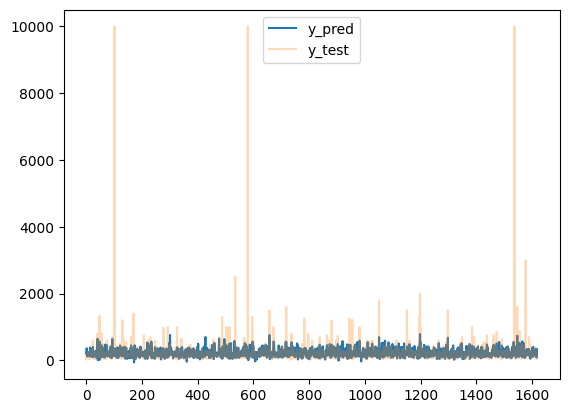

In [30]:

plt.plot(y_pred_linear ,label='y_pred')
plt.plot(y_test,alpha=0.3,label='y_test')
plt.legend()

plt.show()



# we need to do it manually because mae give us the mean absolute value of the difference 
# we can see from the plot and diff_moy =0.57 that the models predicted less than the actual price 

In [31]:
diff_moy=(y_pred_linear-y_test)
np.mean(diff_moy)

0.5703638088226675

# As we can see in the graph the predicted values were lower than the actual values and the mean difference =0.57 
# So we passed the success criteria where we avoided estimating prices that are more than 25 dollars off of the actual price


# recommendations to the business for future work
1 : we can clearly see there are many outliers that go up to 1000 and 10000000 so we should the limits the values of the minimum nights to 6 months  

2 : the prices for private rooms are compared to the prices of  an entire home so I think it’s necessary to put a bar limit for the prices of each type of space

3 : put a bar limit for the prices for all the categories , 10000$ is quite big for renting 
